# EDA

In [ ]:
pip install geopandas

In [46]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame
import shapely.geometry as sgeom

In [95]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv("./.env"))
path1 = os.environ.get("CLEAN_1622")
path2 = os.environ.get("CLOSED")
path3 = os.environ.get("GEOCOORD")
path4 = os.environ.get("DESTFILE_1622")

**Charger et verifier les donnees**

In [96]:
df_1622 = pd.read_csv(path1)
df_1622.head()

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissement,code_insee_de_la_commune,nom_de_la_commune,secteur,ips,effectifs
0,2019,RENNES,035,ILLE-ET-VILAINE,0351231Y,ECOLE PRIMAIRE PRIVEE NOTRE DAME DU SACRE COEUR,35060,LA CHAPELLE DU LOU DU LAC,privé sous contrat,98.2,NaN
1,2019,RENNES,035,ILLE-ET-VILAINE,0351254Y,ECOLE PRIMAIRE PRIVEE ST JOSEPH,35080,CINTRE,privé sous contrat,116.8,NaN
2,2019,RENNES,035,ILLE-ET-VILAINE,0351300Y,ECOLE PRIMAIRE PRIVEE ST ANTOINE,35108,ESSE,privé sous contrat,104.1,NaN
3,2019,RENNES,035,ILLE-ET-VILAINE,0351333J,ECOLE PRIMAIRE PRIVEE STE ANNE,35124,GRAND FOUGERAY,privé sous contrat,107.3,NaN
4,2019,RENNES,035,ILLE-ET-VILAINE,0351360N,ECOLE PRIMAIRE PRIVEE ST JEAN,35266,SAINT ERBLON,privé sous contrat,117.4,NaN


In [97]:
print(df_1622.isnull().sum())

rentree_scolaire                 0
academie                         0
code_du_departement              0
departement                      0
uai                              0
nom_de_l_etablissement          11
code_insee_de_la_commune         0
nom_de_la_commune                0
secteur                          0
ips                              0
effectifs                   182082
dtype: int64


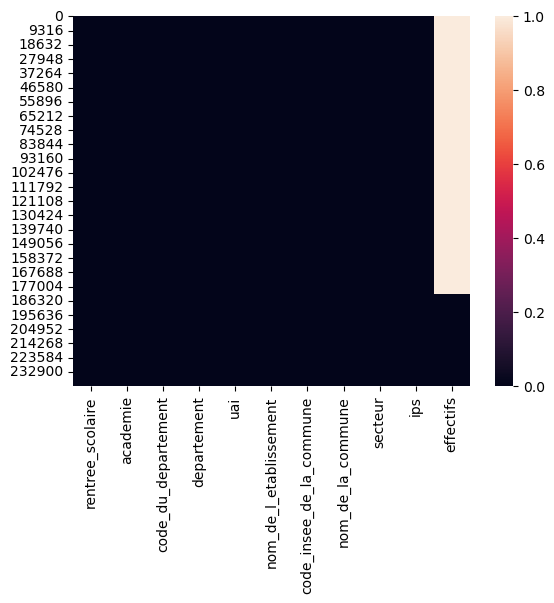

In [98]:
sns.heatmap(df_1622.isnull(), cbar=True)
plt.show()

*Les effectifs sont presents a partir de 2022 donc a prendre en cmpte lors des analyses*

*Nom d'etablissements manquants en avant 2022*

In [99]:
df_1622.describe()

,rentree_scolaire,ips,effectifs
count,242196.000000,242196.000000,60114.000000
mean,2019.495049,103.125163,127.084739
std,2.287713,16.050598,84.046634
min,2016.000000,35.800000,25.000000
25%,2018.000000,93.400000,62.000000
50%,2019.000000,103.200000,107.000000
75%,2021.000000,113.300000,170.000000
max,2023.000000,161.900000,951.000000


In [100]:
(df_1622.describe(include='all'))

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissement,code_insee_de_la_commune,nom_de_la_commune,secteur,ips,effectifs
count,242196.000000,242196,242196,242196,242196,242185,242196,242196,242196,242196.000000,60114.000000
unique,NaN,33,102,105,31786,21671,17584,17304,2,NaN,NaN
top,NaN,NANTES,059,NORD,0351231Y,ECOLE PRIMAIRE,31555,TOULOUSE,public,NaN,NaN
freq,NaN,16841,9712,9712,8,36236,926,926,207853,NaN,NaN
mean,2019.495049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.125163,127.084739
std,2.287713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.050598,84.046634
min,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.800000,25.000000
25%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.400000,62.000000
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.200000,107.000000
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.300000,170.000000


## Visualiser

(array([1.5000e+01, 7.2300e+02, 1.0051e+04, 2.3038e+04, 5.8001e+04,
        8.0455e+04, 4.7346e+04, 1.7281e+04, 4.9340e+03, 3.5200e+02]),
 array([ 35.8 ,  48.41,  61.02,  73.63,  86.24,  98.85, 111.46, 124.07,
        136.68, 149.29, 161.9 ]),
 <BarContainer object of 10 artists>)

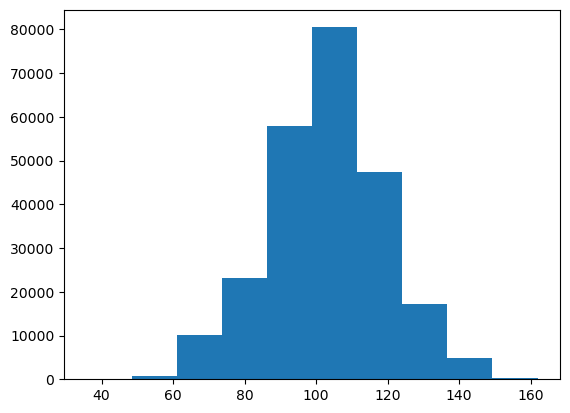

In [101]:
# Visualiser les valeurs numeriques 1 - HISTOGRAME
plt.hist(df_1622['ips'])

<Axes: xlabel='effectifs'>

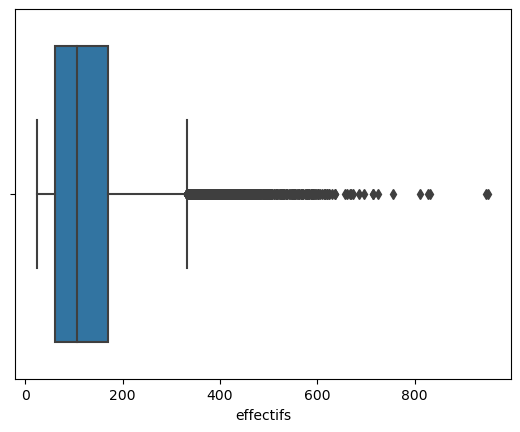

In [102]:
# Visualiser les valeurs numeriques 2 - BOXPLOT
sns.boxplot(x='effectifs', data=df_1622)

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ips', ylabel='Density'>

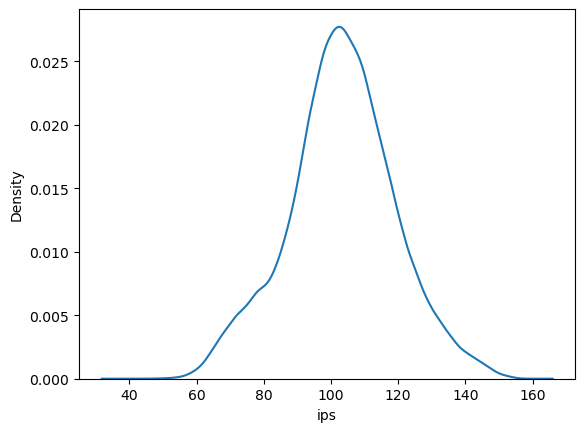

In [103]:
# Visualiser les valeurs numeriques 3 - DENSITY PLOT densite de la distribution
sns.kdeplot(df_1622['ips'])

<Axes: xlabel='secteur', ylabel='ips'>

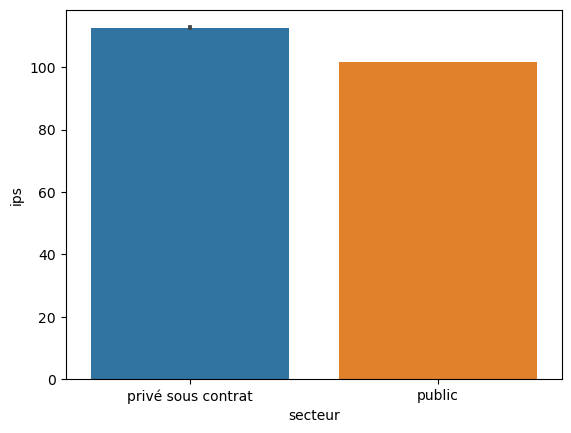

In [104]:
# Visualiser les valeurs categorielles 1 - BAR PLOT - exe colonnes secteur
sns.barplot(x='secteur', y='ips', data=df_1622)

ValueError: 'label' must be of length 'x'

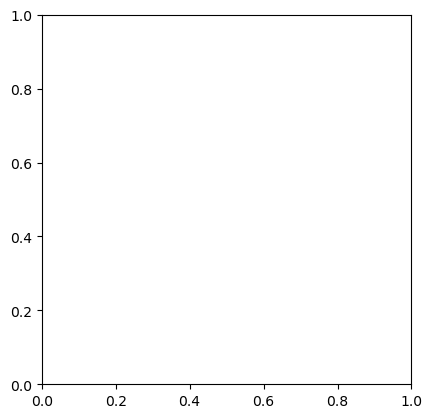

In [105]:
# Visualiser les valeurs categorielles 2 - PIE CHART -visualiser la proportion de chaque categorie
plt.pie(df_1622['secteur'].value_counts(), labels=df_1622['ips'].unique())

In [ ]:
# Explorer les relations -  -

In [ ]:
# Explorer les relations -  -

In [ ]:
# Analyse spaciale avec Geopandas -  -

In [ ]:
# Tendances au long des annees

In [ ]:
# Analyse de subgroupes - ex departement, secteur ...

In [ ]:
# 

## Statistiques descriptives

## Croiser avec etablissements fermes et geolocaliser les etablissements

*Note a propos des etablissements fermes : "les fermetures d'établissements sont des actes définitifs liés à l'immatriculation de ces établissements (il s'agit donc d'une action administrative). Il peut y avoir fermeture administrative d'une école sans que cette école ne cesse ces activités, c'est le cas par exemple de la fusion d'une école maternelle et d'une école élémentaire pour créer une école primaire : une des ancienne écoles est fermée (l'école restante est alors transformée) ou bien les deux écoles sont fermées et une troisième est créée." source: https://www.data.gouv.fr/fr/datasets/etablissements-fermes/#/discussions*

In [ ]:
df_closed= pd.read_csv(path2, sep=";")
df_closed.head()

,numero_uai,appellation_officielle,denomination_principale,patronyme_uai,secteur_public_prive_libe,date_ouverture,date_fermeture,adresse_uai,lieu_dit_uai,boite_postale_uai,...,libelle_departement,libelle_region,libelle_academie,libelle_commune,restauration,herbergement,ecole_maternelle,ecole_elementaire,ulis,greta
0,0500359U,Ecole primaire,ECOLE PRIMAIRE PUBLIQUE,NaN,Public,1966-11-23,1988-08-31,4 RUE SAINT-MAUR,NaN,NaN,...,Manche,Normandie,Normandie,Coutances,1,0,1.0,1.0,0,0
1,0500370F,Ecole primaire,ECOLE PRIMAIRE PUBLIQUE,NaN,Public,1966-11-23,1986-08-31,LE MESNIL SAINT-JEAN,ST PIERRE DE COUTANCES,NaN,...,Manche,Normandie,Normandie,Saint-Pierre-de-Coutances,0,0,1.0,1.0,0,0
2,0500383V,Ecole primaire,ECOLE PRIMAIRE PUBLIQUE,NaN,Public,1966-11-23,1978-08-31,NaN,MARCILLY,NaN,...,Manche,Normandie,Normandie,Marcilly,1,0,1.0,1.0,0,0
3,0500421L,Ecole primaire,ECOLE PRIMAIRE PUBLIQUE,NaN,Public,1966-11-24,1981-12-31,RUE GUY MOQUET,NaN,NaN,...,Manche,Normandie,Normandie,Donville-les-Bains,1,0,1.0,1.0,0,0
4,0500432Y,Ecole primaire Ferdinand Buisson,ECOLE PRIMAIRE PUBLIQUE,FERDINAND BUISSON,Public,1966-11-24,1995-08-31,2 RUE CLEMENT DESMAISONS,NaN,NaN,...,Manche,Normandie,Normandie,Granville,1,0,1.0,1.0,0,0


In [ ]:
print(df_closed.describe(include='all'))

       numero_uai appellation_officielle  denomination_principale  \
count       42288                  42285                    42279   
unique      42288                  17402                      324   
top      0500359U         Ecole primaire  ECOLE PRIMAIRE PUBLIQUE   
freq            1                  10344                    19499   
mean          NaN                    NaN                      NaN   
std           NaN                    NaN                      NaN   
min           NaN                    NaN                      NaN   
25%           NaN                    NaN                      NaN   
50%           NaN                    NaN                      NaN   
75%           NaN                    NaN                      NaN   
max           NaN                    NaN                      NaN   

       patronyme_uai secteur_public_prive_libe date_ouverture date_fermeture  \
count          27640                     42288          42288          42288   
unique     

In [ ]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42288 entries, 0 to 42287
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   numero_uai                 42288 non-null  object 
 1   appellation_officielle     42285 non-null  object 
 2   denomination_principale    42279 non-null  object 
 3   patronyme_uai              27640 non-null  object 
 4   secteur_public_prive_libe  42288 non-null  object 
 5   date_ouverture             42288 non-null  object 
 6   date_fermeture             42288 non-null  object 
 7   adresse_uai                31612 non-null  object 
 8   lieu_dit_uai               13727 non-null  object 
 9   boite_postale_uai          1271 non-null   object 
 10  code_postal_uai            42288 non-null  int64  
 11  localite_acheminement_uai  41356 non-null  object 
 12  coordonnee_x               41810 non-null  float64
 13  coordonnee_y               41810 non-null  flo

In [ ]:
print(df_closed.isnull().sum())

numero_uai                       0
appellation_officielle           3
denomination_principale          9
patronyme_uai                14648
secteur_public_prive_libe        0
date_ouverture                   0
date_fermeture                   0
adresse_uai                  10676
lieu_dit_uai                 28561
boite_postale_uai            41017
code_postal_uai                  0
localite_acheminement_uai      932
coordonnee_x                   478
coordonnee_y                   478
epsg                           327
latitude                       478
longitude                      478
position                       478
appariement                    478
localisation                   478
nature_uai                       0
nature_uai_libe                  0
code_departement                 0
code_region                      0
code_academie                    0
code_commune                     0
libelle_departement              0
libelle_region                   0
libelle_academie    

In [ ]:
df_closed.columns

Index(['numero_uai', 'appellation_officielle', 'denomination_principale',
       'patronyme_uai', 'secteur_public_prive_libe', 'date_ouverture',
       'date_fermeture', 'adresse_uai', 'lieu_dit_uai', 'boite_postale_uai',
       'code_postal_uai', 'localite_acheminement_uai', 'coordonnee_x',
       'coordonnee_y', 'epsg', 'latitude', 'longitude', 'position',
       'appariement', 'localisation', 'nature_uai', 'nature_uai_libe',
       'code_departement', 'code_region', 'code_academie', 'code_commune',
       'libelle_departement', 'libelle_region', 'libelle_academie',
       'libelle_commune', 'restauration', 'herbergement', 'ecole_maternelle',
       'ecole_elementaire', 'ulis', 'greta'],
      dtype='object')

In [117]:
# Definir les colonnes a garder
selected_columns = ["numero_uai", "date_ouverture", "date_fermeture", "nature_uai", "nature_uai_libe"]
# Creer un dataframe avec cette selection puis le sauvegarder
df_closed_filtered = df_closed[selected_columns]
df_closed_filtered.to_csv(path4 + "\etablissements-fermes-filtres.csv", index=False)
print("DataFrame filtre sauvegarde sur:", path4 + "\etablissements-fermes-filtres.csv")

DataFrame filtre sauvegarde sur: C:\Users\Admin\Desktop\PrezJedah\data_cleaned\etablissements-fermes-filtres.csv


In [118]:
df_closed_filtered.describe(include='all')

,numero_uai,date_ouverture,date_fermeture,nature_uai,nature_uai_libe
count,42288,42288,42288,42288.000000,42288
unique,42288,2953,1281,NaN,31
top,0500359U,1965-05-01,1992-08-31,NaN,ECOLE DE NIVEAU ELEMENTAIRE
freq,1,1092,1283,NaN,26797
mean,NaN,NaN,NaN,163.080259,NaN
std,NaN,NaN,NaN,68.165870,NaN
min,NaN,NaN,NaN,101.000000,NaN
25%,NaN,NaN,NaN,151.000000,NaN
50%,NaN,NaN,NaN,151.000000,NaN
75%,NaN,NaN,NaN,151.000000,NaN


In [119]:
print(df_closed_filtered.isnull().sum())

numero_uai         0
date_ouverture     0
date_fermeture     0
nature_uai         0
nature_uai_libe    0
dtype: int64


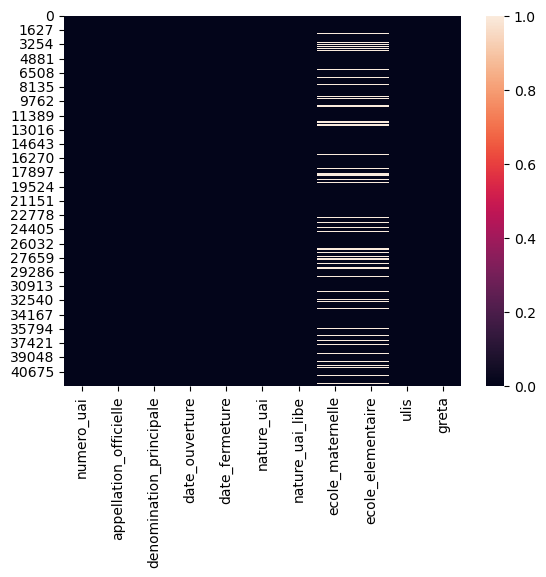

In [110]:
sns.heatmap(df_closed_filtered.isnull(), cbar=True)
plt.show()

In [ ]:
# Sauvegarder uniquement les donnees a utiliser du dataset etablissements fermes df_closed

In [ ]:
# Sauvegarder uniquement les donnees a utiliser du dataset etablissements fermes df_closed
#df.to_csv(path4 + "\df_closed_prepared.csv", index=False)
#print("DataFrame fusionné sauvegarde sur:", path4 + "\df_closed_prepared.csv")

In [ ]:
#df_closed_prepared = pd.read_csv(path5)

## Geolocalisation des etablissements

In [ ]:
df_geo = pd.read_csv(path3, sep=";")

In [ ]:
print(df_geo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64857 entries, 0 to 64856
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   numero_uai                          64857 non-null  object 
 1   appellation_officielle              64856 non-null  object 
 2   denomination_principale             64857 non-null  object 
 3   patronyme_uai                       54057 non-null  object 
 4   secteur_public_prive_libe           64857 non-null  object 
 5   adresse_uai                         61628 non-null  object 
 6   lieu_dit_uai                        8779 non-null   object 
 7   boite_postale_uai                   5413 non-null   object 
 8   code_postal_uai                     64857 non-null  int64  
 9   localite_acheminement_uai           64857 non-null  object 
 10  libelle_commune                     64857 non-null  object 
 11  coordonnee_x                        64138

In [113]:
df_geo.columns

Index(['numero_uai', 'appellation_officielle', 'denomination_principale',
       'patronyme_uai', 'secteur_public_prive_libe', 'adresse_uai',
       'lieu_dit_uai', 'boite_postale_uai', 'code_postal_uai',
       'localite_acheminement_uai', 'libelle_commune', 'coordonnee_x',
       'coordonnee_y', 'epsg', 'latitude', 'longitude', 'appariement',
       'localisation', 'nature_uai', 'nature_uai_libe', 'etat_etablissement',
       'etat_etablissement_libe', 'code_departement', 'code_region',
       'code_academie', 'code_commune', 'libelle_departement',
       'libelle_region', 'libelle_academie', 'position',
       'secteur_prive_code_type_contrat', 'secteur_prive_libelle_type_contrat',
       'code_ministere', 'libelle_ministere', 'date_ouverture'],
      dtype='object')

In [ ]:
df_geo.head()

,numero_uai,appellation_officielle,denomination_principale,patronyme_uai,secteur_public_prive_libe,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,...,code_commune,libelle_departement,libelle_region,libelle_academie,position,secteur_prive_code_type_contrat,secteur_prive_libelle_type_contrat,code_ministere,libelle_ministere,date_ouverture
0,0341298B,Ecole maternelle Arc en Ciel,ECOLE MATERNELLE PUBLIQUE,ARC EN CIEL,Public,149 rue des Quatre Vents,NaN,NaN,34400,LUNEL,...,34145,Hérault,Occitanie,Montpellier,"43.671648379152025, 4.138319556191889",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1972-06-12
1,0341307L,Ecole primaire Jean Jaurès,ECOLE PRIMAIRE PUBLIQUE,JEAN JAURES,Public,1 place DU 14 JUILLET,NaN,NaN,34420,PORTIRAGNES,...,34209,Hérault,Occitanie,Montpellier,"43.3039891375926, 3.33216003205677",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1972-06-12
2,0341321B,Collège Katia et Maurice Krafft,COLLEGE,KATIA ET MAURICE KRAFFT,Public,BOULEVARD YVES DU MANOIR,NaN,3013,34513,BEZIERS CEDEX,...,34032,Hérault,Occitanie,Montpellier,"43.336826651792556, 3.2495802249959187",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1974-04-06
3,0341342Z,Ecole maternelle les Garrigues,ECOLE MATERNELLE PUBLIQUE,LES GARRIGUES,Public,1008 allées de l'Europe,NaN,NaN,34990,JUVIGNAC,...,34123,Hérault,Occitanie,Montpellier,"43.61440482767392, 3.8050099468317837",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1973-06-15
4,0341344B,Ecole maternelle André Malraux,ECOLE MATERNELLE PUBLIQUE,ANDRE MALRAUX,Public,Rue André Malraux,NaN,NaN,34280,LA GRANDE MOTTE,...,34344,Hérault,Occitanie,Montpellier,"43.562660400295485, 4.090050326991836",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1973-06-15


In [ ]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64857 entries, 0 to 64856
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   numero_uai                          64857 non-null  object 
 1   appellation_officielle              64856 non-null  object 
 2   denomination_principale             64857 non-null  object 
 3   patronyme_uai                       54057 non-null  object 
 4   secteur_public_prive_libe           64857 non-null  object 
 5   adresse_uai                         61628 non-null  object 
 6   lieu_dit_uai                        8779 non-null   object 
 7   boite_postale_uai                   5413 non-null   object 
 8   code_postal_uai                     64857 non-null  int64  
 9   localite_acheminement_uai           64857 non-null  object 
 10  libelle_commune                     64857 non-null  object 
 11  coordonnee_x                        64138

In [ ]:
df_geo.describe()

,code_postal_uai,coordonnee_x,coordonnee_y,latitude,longitude,nature_uai,etat_etablissement,code_region,code_academie,secteur_prive_code_type_contrat,code_ministere
count,64857.000000,6.413800e+04,6.413800e+04,64136.000000,64136.000000,64857.000000,64857.000000,64857.000000,64857.000000,64853.000000,64857.000000
mean,54584.376860,6.668896e+05,6.594922e+06,45.373680,2.375716,184.512003,1.007817,48.650261,17.288897,87.025488,5.975099
std,27629.726114,2.054937e+05,7.521402e+05,9.717190,10.750854,86.950993,0.100498,28.748292,14.624720,27.146119,0.946995
min,1000.000000,1.234000e+03,1.234000e+03,-21.386913,-63.106640,101.000000,1.000000,0.000000,1.000000,10.000000,0.000000
25%,31770.000000,5.274608e+05,6.450440e+06,44.916115,0.796308,151.000000,1.000000,27.000000,9.000000,99.000000,6.000000
50%,59112.000000,6.588342e+05,6.723670e+06,47.411277,2.465865,151.000000,1.000000,44.000000,14.000000,99.000000,6.000000
75%,77185.000000,8.324052e+05,6.865906e+06,48.857868,4.822663,151.000000,1.000000,76.000000,23.000000,99.000000,6.000000
max,98890.000000,1.240441e+06,8.598299e+06,51.071190,55.825493,390.000000,3.000000,94.000000,70.000000,99.000000,80.000000


In [ ]:
print(df_geo.describe(include='all'))

       numero_uai appellation_officielle  denomination_principale  \
count       64857                  64856                    64857   
unique      64857                  37800                      603   
top      0341298B         Ecole primaire  ECOLE PRIMAIRE PUBLIQUE   
freq            1                   5064                    13817   
mean          NaN                    NaN                      NaN   
std           NaN                    NaN                      NaN   
min           NaN                    NaN                      NaN   
25%           NaN                    NaN                      NaN   
50%           NaN                    NaN                      NaN   
75%           NaN                    NaN                      NaN   
max           NaN                    NaN                      NaN   

       patronyme_uai secteur_public_prive_libe     adresse_uai lieu_dit_uai  \
count          54057                     64857           61628         8779   
unique       

In [ ]:
print(df_geo.isnull().sum())

numero_uai                                0
appellation_officielle                    1
denomination_principale                   0
patronyme_uai                         10800
secteur_public_prive_libe                 0
adresse_uai                            3229
lieu_dit_uai                          56078
boite_postale_uai                     59444
code_postal_uai                           0
localite_acheminement_uai                 0
libelle_commune                           0
coordonnee_x                            719
coordonnee_y                            719
epsg                                    712
latitude                                721
longitude                               721
appariement                             719
localisation                            719
nature_uai                                0
nature_uai_libe                           0
etat_etablissement                        0
etat_etablissement_libe                   0
code_departement                

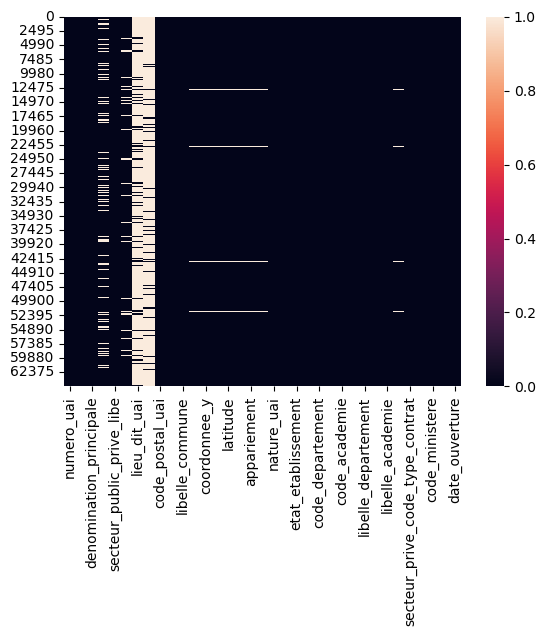

In [ ]:
sns.heatmap(df_geo.isnull(), cbar=True)
plt.show()

In [120]:
# Definir les colonnes a garder
selected_columns = ['numero_uai', 'appellation_officielle', 'denomination_principale','patronyme_uai', 'secteur_public_prive_libe', 'adresse_uai',
       'lieu_dit_uai', 'boite_postale_uai', 'code_postal_uai','localite_acheminement_uai', 'libelle_commune', 'coordonnee_x',
       'coordonnee_y', 'epsg', 'latitude', 'longitude', 'appariement', 'localisation', 'nature_uai', 'nature_uai_libe', 'etat_etablissement',
       'etat_etablissement_libe', 'code_departement', 'code_region', 'code_academie', 'code_commune', 'libelle_departement',
       'libelle_region', 'libelle_academie', 'position', 'secteur_prive_code_type_contrat', 'secteur_prive_libelle_type_contrat', 'code_ministere', 'libelle_ministere', 'date_ouverture']
# Creer un dataframe avec cette selection puis le sauvegarder
df_geo_filtered = df_geo[selected_columns]
df_geo_filtered.to_csv(path4 + "\geolocalisation-etablissements-filtered.csv", index=False)
print("DataFrame filtre sauvegarde sur:", path4 + "\geolocalisation-etablissements-filtered.csv")

DataFrame filtre sauvegarde sur: C:\Users\Admin\Desktop\PrezJedah\data_cleaned\geolocalisation-etablissements-filtered.csv


In [ ]:
#df = df_1622.merge(df_geo, how='left', left_on="uai", right_on='numero_uai' )